In [1]:
__author__='h3imdallr'

In [2]:
"""
requirements
- python 2.7.x
- statsmodels 0.6.1+ installed
- anom_detect (originally pycularity, 
but with stasmodels.api, not rpy2)
- data
"""

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

#make sure anom_detect package is downloaded
from anom_detect import detect_ts, py_seasonal

importing seasonal decomposition module was successful.


** function in use: `plot_STL()` **

In [3]:
def plot_STL(inDF ,saveapth):
    """ 
    inDF: STL_DF is expected 
    out: figure.png is stored (optional)
    """
    fig = plt.figure(figsize=(22, 12))

    plt.subplot(311); plt.plot(inDF.index, inDF['trend'])
    plt.subplot(312); plt.plot(inDF.index, inDF['seasonal'])
    plt.subplot(313); plt.plot(inDF.index, inDF['residual'])

#     plt.savefig(saveapth, dpi=300);
#     plt.close()
    
    return None

** Data loading: **

In [4]:
# data source: Numenta Anomaly Benchmark(NAB) 
# https://github.com/numenta/NAB/tree/master/data
n_file = 'machine_temperature_system_failure'
timeS_DF = pd.read_csv('./data/%s.csv' % n_file, usecols=['timestamp', 'value'])

print ">>>data loading successful. \n dataframe collected: \n", timeS_DF.head()

>>>data loading successful. 
 dataframe collected: 
             timestamp      value
0  2013-12-02 21:15:00  73.967322
1  2013-12-02 21:20:00  74.935882
2  2013-12-02 21:25:00  76.124162
3  2013-12-02 21:30:00  78.140707
4  2013-12-02 21:35:00  79.329836


In [5]:
"""  STL Decomposition  """
timeS_DF.columns = ["timestamp", "value"]
timeS_DF['timestamp'] = pd.to_datetime(timeS_DF['timestamp'])
timeS_DF.set_index('timestamp', inplace=True)

# >>> Maybe Resammple HERE <<<
resample_DF = timeS_DF.resample('T', how ='mean')
flow = resample_DF['value']

flow.head(10)

timestamp
2013-12-02 21:15:00    73.967322
2013-12-02 21:16:00          NaN
2013-12-02 21:17:00          NaN
2013-12-02 21:18:00          NaN
2013-12-02 21:19:00          NaN
2013-12-02 21:20:00    74.935882
2013-12-02 21:21:00          NaN
2013-12-02 21:22:00          NaN
2013-12-02 21:23:00          NaN
2013-12-02 21:24:00          NaN
Freq: T, Name: value, dtype: float64

In [6]:
flow.dropna(inplace=True)

original time-series looks like below:

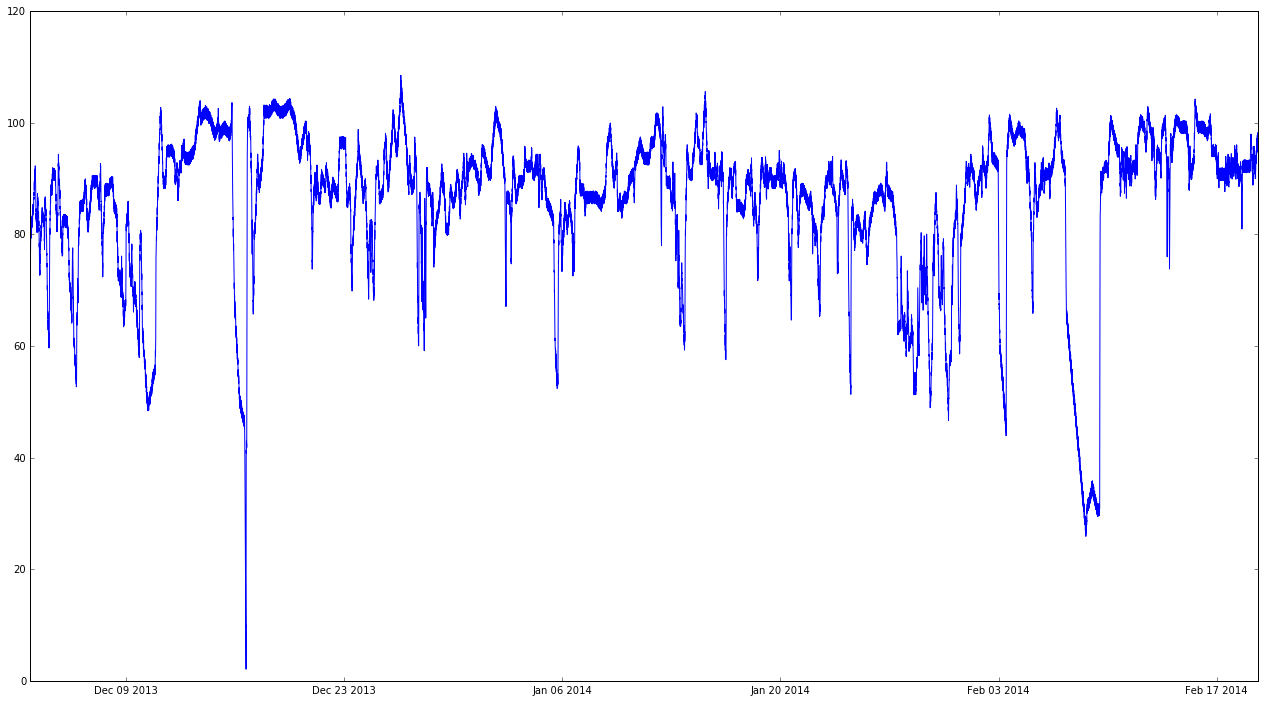

In [7]:
fig= plt.figure(figsize=(22,12)); plt.plot(flow)

In [8]:
res = py_seasonal.seasonal_decompose(flow)

trend = res.trend
seasonal = res.seasonal
residual = res.resid

STL_DF = pd.concat([residual, seasonal, trend], axis=1, keys=['residual', 'seasonal', 'trend'])
print """>>> STL Decomposition Compeleted """

>>> STL Decomposition Compeleted 


** Plot STL decomposition graph **

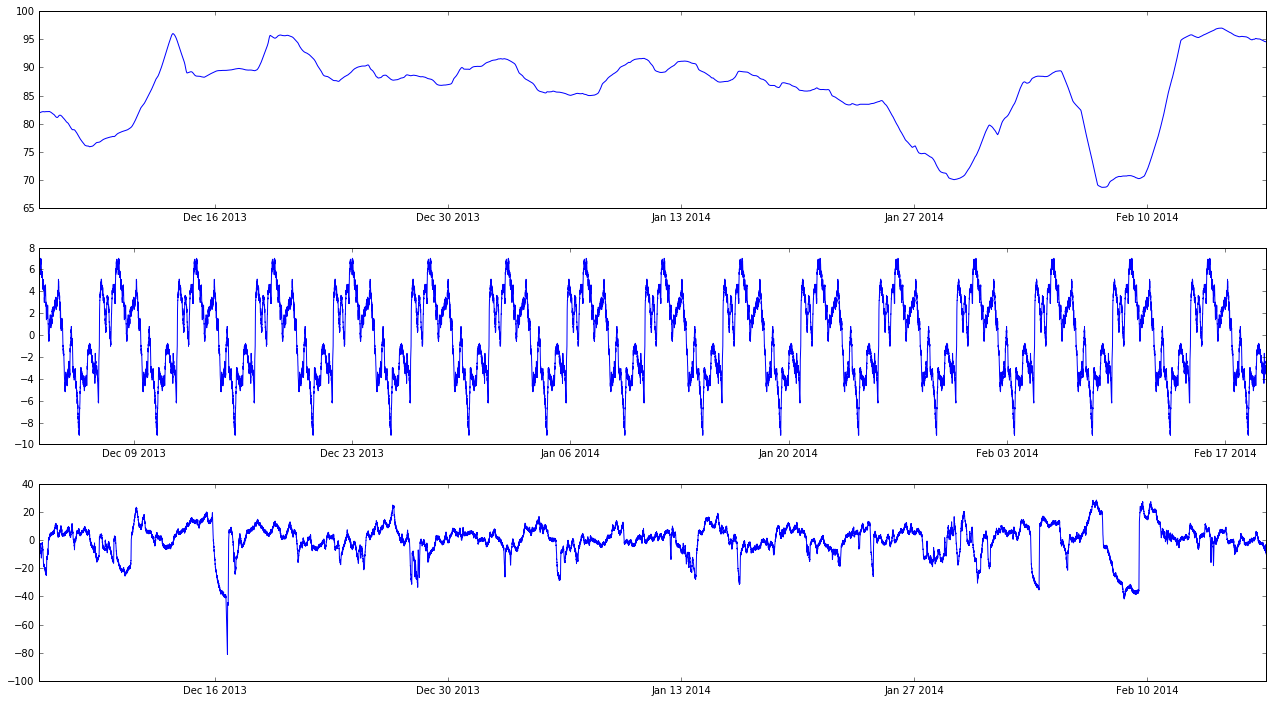

In [9]:
# saving fig is optional(refer to function)
savepath = 'outputs/STLDecompose_%s.png' % n_file

plot_STL(STL_DF, savepath)

first subplot: Trend
second subplot: Seasonality
thid subplot: Residual

** Analysis **


We can extract trend/seasonality/residual from original time-series, `flow`.  

The simple understanding between stl components and original signal:

![stl](stl_example.png)
[source](https://anomaly.io/seasonal-trend-decomposition-in-r/)

The good use of each:
* trend - help indentifiy macro move
* seasonality - help indentify repeating time-series pattern
* residual - help detect randomness, abnormal activities, or level of stationary of the signal.


This STL decomposition analysis provides basis for **time-series anomaly detection**, which will be introduced.

(End of Document)